<a href="https://colab.research.google.com/github/m7saikat/IE-7374/blob/master/Lab_2(d)_MABs_Non_Stationary_OptimisticInitialValues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab2-d  Multi-armed Bandits Problem(Non-Stationary with Optimistic Initial Values)
---


## 1- Introduction

All the methods we have discussed so far are dependent to some extent on the initial action-value estimates. In the language of statistics, these methods are biased by their initial estimates. For the sample-average methods, the bias disappears once all actions have been selected at least once, but for methods with constant α, the bias is permanent, though decreasing over time as given by (2.6). In practice, this kind of bias is usually not a problem and can sometimes be very helpful. The downside is that the initial estimates become, in eﬀect, a set of parameters that must be picked by the user, if only to set them all to zero. The upside is that they provide an easy way to supply some prior knowledge about what level of rewards can be expected. 

Initial action values can also be used as a simple way to encourage exploration. Suppose that instead of setting the initial action values to zero, as we did in the 10-armed testbed, we set them all to $+5$. Recall that the true rewards in this problem are selected from a normal distribution with mean 0 and variance 1. An initial estimate of $+5$ is thus wildly optimistic. But this optimism encourages action-value methods to explore. Whichever actions are initially selected, the reward is less than the starting estimates; the learner switches to other actions, being “disappointed” with the rewards it is receiving. The result is that all actions are tried several times before the value estimates converge. The system does a fair amount of exploration even if greedy actions are selected all the time. 

In this notebook we would compare two greedy-epsilon methods. One with initial $Q_1 = 0$ and another with initial $Q_1 = +5$. We would create the plots and compare the optimal action taken in both the cases.

### Importing Libraries


---


In [0]:
import numpy as np
import matplotlib.pyplot as plt

## 2 - Problem Definition

### Expected initial action value
---


In [0]:
# This function generates the true value of actions
def expected_action_value_function(mu=0, scale=1, arms=10):
    expected_action_value = np.random.uniform(1, -1 , arms)
    return expected_action_value

### Adding randomness to the expected action values


---


In [0]:
def update_expected_action_value(expected_action_value):
    expected_action_value += np.random.normal(0, 0.01, arms) 
    return(expected_action_value)

###  Reward function
---

In [0]:
def reward_function(action_taken, expected_action_value,scale=1):
    reward = expected_action_value [action_taken] + np.random.normal(scale) # reward=N(Mu,1) or Mu+N(0,1)
    return reward

## 3 - Implementation

### Methods 1:  <span style="color:blue">$\epsilon-greedy$</span>  function 

---

In [0]:
# Define the e-greedy funtion
def e_greedy(estimate_action_value,e,arms): 
    # genereate a random num (0,1) to be compared with epsilon
    e_estimator = np.random.uniform(0, 1) 
    # epsilon-greedy appraoch
    action = np.argmax(estimate_action_value) if e_estimator > e else np.random.choice(np.arange(arms))
    return action

### Action Value estimation-  <span style="color:blue">Method 2: Weighted Average approach</span> 

---




In [0]:
# Define estimate_action_value function (using sample average method)
def weighted_average (estimate_action_value, action, reward, alpha):
  estimate_action_value[action] = estimate_action_value[action] + alpha * (reward - estimate_action_value[action])
  return estimate_action_value

### <span style="color:red">K-armed bandit problem</span>

---

The only differnece here with the other problems we have seen so far is that this problem also takes in initial $Q_1$ values

In [0]:
def multi_arm_bandit_problem(alpha = 0.1, arms = 10, steps = 1000, e = 0.1, expected_action_value = [],scale=1, initial_q1 = 0 ):
    # Initilization 
    overall_reward, optimal_action = [], [] 

    # Initial Action values is set to initial_q1
    estimate_action_value = np.zeros(arms) + initial_q1

    #number of times is action (arm) is taken 
    count = np.zeros(arms) 

    # Main loop
    for s in range(0, steps):

        # Select an action
        action=e_greedy(estimate_action_value,e, arms)

        # Adding randomness to the action value for each bandit problem,
        # thus simulating variable rewards over time. This segment makes a stationary
        # reward system, non-stationary.
        expected_action_value = update_expected_action_value(expected_action_value) 

        # Observe the reward for the selected Action
        reward = reward_function(action, expected_action_value,scale)

        # Update Estimates of Action Value for the selected Action based on its observed Reward
        estimate_action_value=weighted_average(estimate_action_value, action, reward, alpha)
        
        # Update rewards' list
        overall_reward.append(reward)

        # If the optimal action is taken
        optimal_action.append(action == np.argmax(expected_action_value))

        # Increment the number of times the selected action is takern
        count[action] += 1
        
    return overall_reward, optimal_action

### Multi-arm testbed

---

In [0]:
def run_game(alpha, epsilon, runs = 10, steps = 1000, arms = 10, initial_q1 = 0):
    rewards = np.zeros((runs, steps))
    optimal_actions = np.zeros((runs, steps))
    expected_action_value = expected_action_value_function(1, -1 , arms=arms)
    for run in range(0, runs):
        rewards[run][:], optimal_actions[run][:] = multi_arm_bandit_problem(alpha= alpha, 
                                                                             arms = arms, 
                                                                             steps = steps,
                                                                             e = epsilon,
                                                                            expected_action_value = expected_action_value,
                                                                             initial_q1 = initial_q1,)
    rewards_avg = np.average(rewards, axis = 0)
    optimal_action_perc = np.average(optimal_actions, axis = 0)
    return(rewards_avg, optimal_action_perc)

### Plotting the reward performance and optimal action percentage of the agents with different epsilon values.


---


1. Scenario with epsilon value of 0.1, Q1 0 : Blue 
2. Scenario with epsilon value of 0.0, Q1 5 : Orange  

In [0]:
# Number of arms of bandits.
arms=10

# Numner of episodes in each run
steps = 5000

# Total number of runs
runs = 5000   

# Default initial Estimated Action Value for each arm
initial_q1 = 0 

# We denote the step-size parameter by α (aplha).
alpha=0.1

# The list of initial Q1 estimates for both the plots
initial_qs = [0, 5]

# The list of corresponding epsilon values for both the plots
epsilons = [0.1, 0.0]

In [0]:
# Running the Experiment with different Epsilon and Q1 Values
rewards_avg_by_epsilon = dict()
optimal_action_perc_by_epsilon = dict()
for initial_q1, epsilon in zip(initial_qs, epsilons):
    print('Running for epsilon: {} and Q1: {}...'.format(epsilon, initial_q1))
    rewards_avg, optimal_action_perc = run_game(alpha, epsilon, runs, steps, arms, initial_q1)
    rewards_avg_by_epsilon[initial_q1] = rewards_avg
    optimal_action_perc_by_epsilon[initial_q1] = optimal_action_perc
print('Experiment is complete') 

Running for epsilon: 0.1 and Q1: 0...
Running for epsilon: 0.0 and Q1: 5...
Experiment is complete


Once we have the reward performance and optimal action from the test bed, we can now plot the graphs using the in-built function `plot` of matplotlib.

Text(0, 0.5, 'Optimal action (in fraction)')

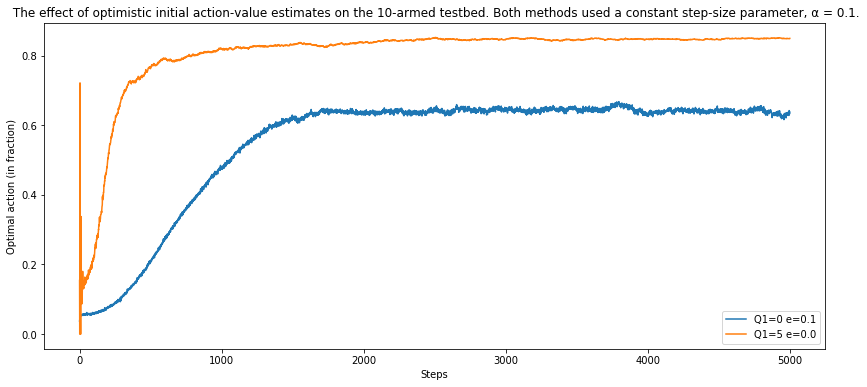

In [0]:
f, ax = plt.subplots(nrows=1, ncols=1,figsize=(14, 6))
for initial_q1, epsilon in zip(initial_qs, epsilons):
    ax.plot(range(steps), optimal_action_perc_by_epsilon[initial_q1], label='Q1={} e={}'.format(initial_q1, epsilon))
ax.legend(loc='lower right')
plt.title(' The eﬀect of optimistic initial action-value estimates on the 10-armed testbed. Both methods used a constant step-size parameter, α = 0.1.')
plt.xlabel('Steps')
plt.ylabel('Optimal action (in fraction)')